<a href="https://colab.research.google.com/github/minhduc01168/ET_Tri_tue_nhan_tao/blob/master/BTL_AI_Tran_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling

In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, accuracy_score
from imblearn import under_sampling, over_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_normalization.csv')

In [ ]:
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.0,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,1.0,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,1.0,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,1.0,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,1.0,0.319149,0.0,0.000000


In [ ]:
X = pd.DataFrame(df)
X = X.drop(['loan_status'], axis=1)
y = df[['loan_status']]
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29998 non-null  float64
 1   person_income               29998 non-null  float64
 2   person_home_ownership       29998 non-null  float64
 3   person_emp_length           29998 non-null  float64
 4   loan_intent                 29998 non-null  float64
 5   loan_grade                  29998 non-null  float64
 6   loan_amnt                   29998 non-null  float64
 7   loan_int_rate               29998 non-null  float64
 8   loan_percent_income         29998 non-null  float64
 9   cb_person_default_on_file   29998 non-null  float64
 10  cb_person_cred_hist_length  29998 non-null  float64
dtypes: float64(11)
memory usage: 2.5 MB


In [ ]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.038462,0.026807,0.666667,0.3125,0.2,0.25,0.018450,0.400841,0.191489,0.0,0.000000
1,0.038462,0.028263,0.666667,0.1250,1.0,0.00,0.073801,0.120533,0.510638,0.0,0.000000
2,0.038462,0.028749,0.666667,0.3750,1.0,0.75,0.040590,0.653118,0.319149,0.0,0.071429
3,0.038462,0.028749,0.666667,0.1250,0.4,0.00,0.147601,0.224947,0.936170,0.0,0.000000
4,0.153846,0.032634,0.000000,0.5000,0.2,0.25,0.046125,0.390329,0.319149,0.0,0.000000


In [ ]:
y.head()

,loan_status
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
y = y.values.ravel()

In [ ]:
# K-best Method
best_features = SelectKBest(score_func=chi2, k=11) #Chọn các tính năng theo k điểm cao nhất.
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)# Điểm số của các tính năng
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)# Nối các đối tượng pandas dọc theo cột.
feature_scores.columns = ["Feature","Score"]
print(feature_scores.nlargest(11,"Score"))


                       Feature       Score
5                   loan_grade  979.486278
9    cb_person_default_on_file  756.959610
8          loan_percent_income  510.348486
2        person_home_ownership  509.438695
7                loan_int_rate  316.182079
1                person_income  160.386595
3            person_emp_length   40.968762
6                    loan_amnt   26.140949
4                  loan_intent   24.132526
0                   person_age    3.029378
10  cb_person_cred_hist_length    3.014954


### **KNN**

### **Mô hình ban đầu**
Tạo và các tham số được sử dụng mặc định.

Accuracy score of KNN model 1 is: 0.8846666666666667
[[4593  166]
 [ 526  715]]
Classification Report of KNN 1st Model
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      4759
         1.0       0.81      0.58      0.67      1241

    accuracy                           0.88      6000
   macro avg       0.85      0.77      0.80      6000
weighted avg       0.88      0.88      0.88      6000



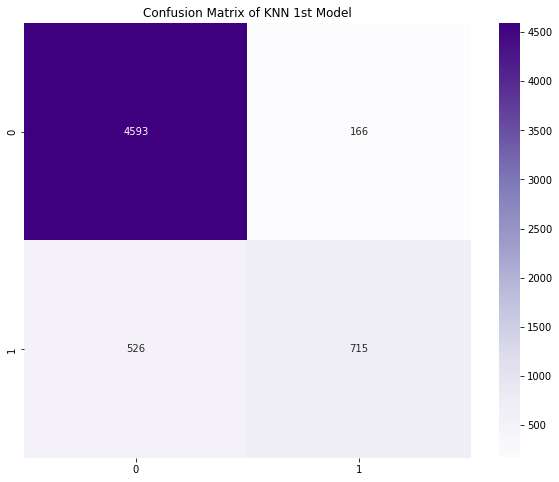

In [ ]:
### KNN Classifier
# 1) Initial

# Train, Test, Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=152, stratify=y)

# Define the model
clf_1 = KNeighborsClassifier()

 # Fit the model
clf_1.fit(X_train,Y_train)

# Make prediction
pred_1 = clf_1.predict(X_test)

# Accuracy score
print('Accuracy score of KNN model 1 is:', accuracy_score(Y_test, pred_1))

# Confusion Matrix
conmat_1 = confusion_matrix(Y_test, pred_1)
print(conmat_1)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of KNN 1st Model')
sns.heatmap(conmat_1, annot=True, cmap="Purples", fmt="d",cbar=True)

 # Classification Report
print('Classification Report of KNN 1st Model')
print(classification_report(Y_test, pred_1))


## **Decision Tree Classifier**

Accuracy score of Decision Tree model 1 is: 0.8861666666666667
[[4388  371]
 [ 312  929]]
Classification Report of Decision Tree 1st Model
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      4759
         1.0       0.71      0.75      0.73      1241

    accuracy                           0.89      6000
   macro avg       0.82      0.84      0.83      6000
weighted avg       0.89      0.89      0.89      6000



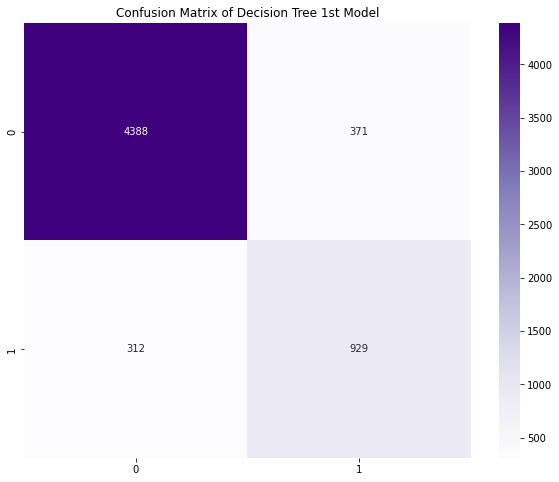

In [ ]:
# 1) Initial

# Train, Test, Split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, y, test_size = 0.2, random_state=152, stratify=y)

# Define the model
clf_2 = DecisionTreeClassifier()

# Fit the model
clf_2.fit(X_train_2,Y_train_2)

# Make prediction
pred_2 = clf_2.predict(X_test_2)

# Accuracy score
print('Accuracy score of Decision Tree model 1 is:', accuracy_score(Y_test_2, pred_2))

# Confusion Matrix
conmat_2 = confusion_matrix(Y_test_2, pred_2)
print(conmat_2)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Decision Tree 1st Model')
sns.heatmap(conmat_2, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Decision Tree 1st Model')
print(classification_report(Y_test_2, pred_2))

## **Random Forest Classifier**

Accuracy score of Random Forest model is: 0.9276666666666666
[[4732   27]
 [ 407  834]]
Classification Report of Random Forest Model
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      4759
         1.0       0.97      0.67      0.79      1241

    accuracy                           0.93      6000
   macro avg       0.94      0.83      0.87      6000
weighted avg       0.93      0.93      0.92      6000



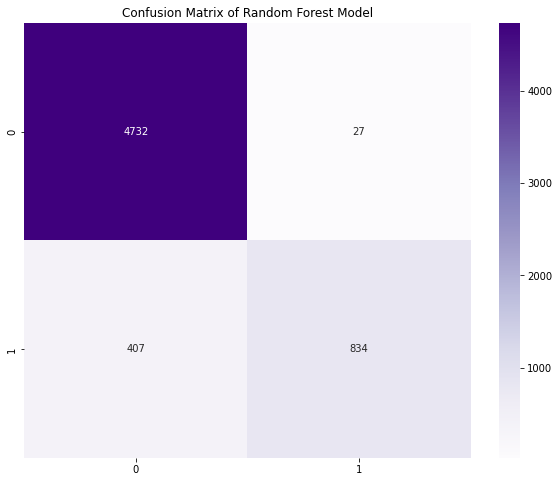

In [ ]:
#1) Initial

# Train, Test, Split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X, y, test_size = 0.2, random_state=152, stratify=y)

# Define the model
clf_3 = RandomForestClassifier()

# Fit the model
clf_3.fit(X_train_3,Y_train_3)

# Make prediction
pred_3 = clf_3.predict(X_test_3)

# Accuracy score
print('Accuracy score of Random Forest model is:', accuracy_score(Y_test_3, pred_3))

# Confusion Matrix
conmat_3 = confusion_matrix(Y_test_3, pred_3)
print(conmat_3)
plt.figure(figsize=(10,8))
plt.title('Confusion Matrix of Random Forest Model')
sns.heatmap(conmat_3, annot=True, cmap="Purples", fmt="d",cbar=True)

# Classification Report
print('Classification Report of Random Forest Model')
print(classification_report(Y_test_3, pred_3))